In [43]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [44]:
# let's read in our flower data...
# 
# iris_cleaned.csv and hw4pr1iris_cleaner.ipynb should be in this folder
# 
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [45]:
df_model1 = df_tidy 
df_model1

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [46]:

# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ["0","1","2","3","4","5","6","7","8","9"]   # int to str
SPECIES_INDEX = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [47]:
A = df_model1.to_numpy()   
A = A.astype('float64') 

In [48]:

NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [49]:
# choose a row index, n:
n = 42
print(f"birth #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['actual_digit']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

birth #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0
 

In [50]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16. 

In [51]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [3. 7. 8. ... 7. 3. 1.]
The corresponding data rows are 
 [[ 0.  0.  3. 10. 13.  7.  0.  0.  0.  1. 14. 13. 15. 14.  0.  0.  0.  0.
  15.  5. 14.  9.  0.  0.  0.  0.  0. 10. 16.  5.  0.  0.  0.  0.  0.  7.
  14. 16.  3.  0.  0.  4.  5.  0.  2. 16.  4.  0.  0. 10. 16. 10.  8. 16.
   3.  0.  0.  0.  5. 12. 14.  8.  0.  0.]
 [ 0.  0.  0. 10. 12. 15. 16. 13.  0.  0.  6. 15.  6.  4. 14.  9.  0.  0.
  10.  6.  0.  3. 14.  2.  0.  1. 14.  1.  0. 12.  6.  0.  0.  0.  3.  0.
   5. 13.  0.  0.  0.  0.  0.  1. 13.  3.  0.  0.  0.  0.  0.  6. 13.  0.
   0.  0.  0.  0.  0. 14.  6.  0.  0.  0.]
 [ 0.  0.  2. 12. 14.  8.  0.  0.  0.  0. 13. 13. 15. 12.  0.  0.  0.  5.
  15.  2. 10.  6.  0.  0.  0.  2. 14. 13. 14.  1.  0.  0.  0.  0.  0. 11.
  15. 13.  1.  0.  0.  0.  1. 15.  3. 14.  7.  0.  0.  0.  6. 13.  1. 16.
   4.  0.  0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  1. 14. 16. 12.  0.  0.  0.  0.  5. 16.  9. 16.  6.  0.  0.  0.  3.
  11.  0. 14.  9.  0.  0.  0.  0.  0. 

In [52]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [5. 0. 2. 1. 9. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 6. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0.

In [79]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 4   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 4


In [80]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [5. 0. 8. 2. 3. 6. 3. 5. 7. 8. 2. 8. 7. 5. 9. 9. 4. 2. 8. 3. 2. 8. 5. 8.
 8. 6. 7. 4. 5. 5. 8. 9. 3. 3. 8. 7. 0. 8. 8. 6. 8. 8. 2. 3. 8. 9. 3. 3.
 7. 8. 5. 2. 0. 6. 8. 8. 2. 0. 8. 3. 5. 4. 8. 6. 7. 8. 3. 0. 8. 7. 0. 8.
 0. 9. 7. 3. 5. 8. 0. 7. 7. 8. 8. 3. 6. 6. 8. 3. 7. 0. 4. 7. 3. 8. 3. 7.
 8. 6. 7. 8. 5. 8. 4. 0. 5. 0. 4. 2. 8. 7. 3. 6. 8. 8. 7. 8. 2. 6. 3. 8.
 8. 7. 2. 8. 3. 9. 4. 8. 8. 6. 3. 6. 3. 3. 8. 6. 8. 5. 7. 5. 8. 8. 8. 9.
 6. 8. 9. 8. 3. 6. 3. 4. 8. 3. 0. 0. 4. 5. 3. 7. 5. 8. 8. 8. 0. 6. 6. 7.
 8. 5. 3. 8. 8. 6. 8. 7. 8. 8. 2. 8. 5. 8. 8. 3. 5. 8. 5. 8. 8. 3. 4. 0.
 0. 6. 8. 8. 8. 3. 8. 5. 8. 3. 3. 9. 3. 0. 2. 0. 3. 9. 2. 8. 3. 8. 9. 6.
 5. 7. 8. 8. 8. 0. 3. 8. 3. 5. 4. 7. 0. 6. 5. 8. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 8. 4. 8. 6. 0. 9. 4. 2. 6. 8. 7. 3. 3. 8. 9. 7. 9. 0. 8. 3. 3. 8.
 6. 4. 3. 6. 8. 8. 6. 3. 0. 4. 3. 5. 8. 8. 5. 6. 8. 3. 0. 3. 7. 5. 3. 6.
 8. 8. 3. 8. 8. 8. 8. 3. 3. 0. 7. 7. 5. 7. 3. 3. 6. 7. 3. 3. 8. 8. 8. 3.
 3. 8. 2. 3. 5. 8. 2. 3. 3. 5. 8.

In [81]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :            5 5              
row   1 :            0 0              
row   2 :            8 2              incorrect
row   3 :            2 1              incorrect
row   4 :            3 9              incorrect
row   5 :            6 6              
row   6 :            3 4              incorrect
row   7 :            5 5              
row   8 :            7 7              
row   9 :            8 2              incorrect
row  10 :            2 6              incorrect
row  11 :            8 2              incorrect
row  12 :            7 7              
row  13 :            5 5              
row  14 :            9 9              
row  15 :            9 9              
row  16 :            4 4              
row  17 :            2 1              incorrect
row  18 :            8 2              incorrect
row  19 :            3 3              
row  20 :            2 1              incorrect
row  21 :            8 8              
row  22 :            5 5              
row  23 :    

197

In [82]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
    
#
# Lab task:  build trees at depths 1 and 2+ (submit in this notebook -- see next cell for depth-1 solution)
#

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="pix28 <= 4.5\ngini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.16\nsamples = 154\nvalue = [141, 0, 2, 0, 5, 3, 1, 0, 0, 2]\nclass = 0", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="pix41 <= 5.5\ngini = 0.694\nsamples = 11\nvalue = [1, 0, 1, 0, 5, 3, 1, 0, 0, 0]\nclass = 4", fillcolor="#cef8f0"] ;
2 -> 3 ;
4 [label="gini = 0.667\nsamples = 6\nvalue = [1, 0, 1, 0, 0, 3, 1, 0, 0, 0]\nclass = 5", fillcolor="#b0d8f5"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsampl

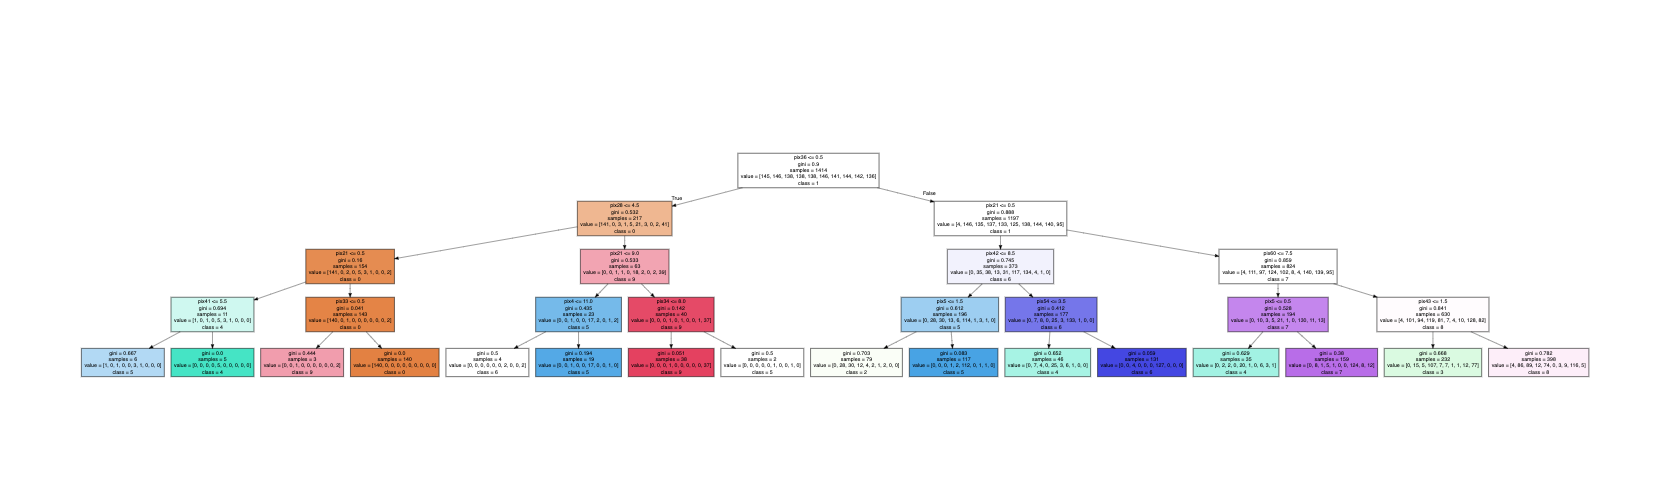

In [83]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./digits_screenshot1.png")  # be sure it's in the right place!

In [57]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} is our choice for an underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.2030
depth:  2  cv accuracy:  0.3182
depth:  3  cv accuracy:  0.4844
depth:  4  cv accuracy:  0.5707
depth:  5  cv accuracy:  0.6726

best_depth = 5 is our choice for an underfitting/overfitting balance.


In [58]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 5


In [59]:
#
# Now, let's see the tree!
#

predicted_labels = dtree_model_tuned.predict(X_test)   
actual_labels = y_test
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
#
# your task: copy, alter, and re-run the above cells so that you create and 
#            include an image of this deeper tree here in this file
#


Results on test set:  245 correct out of 354 total.
file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="pix28 <= 4.5\ngini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.16\nsamples = 154\nvalue = [141, 0, 2, 0, 5, 3, 1, 0, 0, 2]\nclass = 0", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="pix37 <= 5.5\ngini = 0.694\nsamples = 11\nvalue = [1, 0, 1, 0, 5, 3, 1, 0, 0, 0]\nclass = 4", fillcolor="#cef8f0"] ;
2 -> 3 ;
4 [label="pix57 <= 0.5\ngini = 0.667\nsamples = 6\nvalue = [1, 0, 1, 0, 0, 3, 1, 0, 0, 0]\nclas

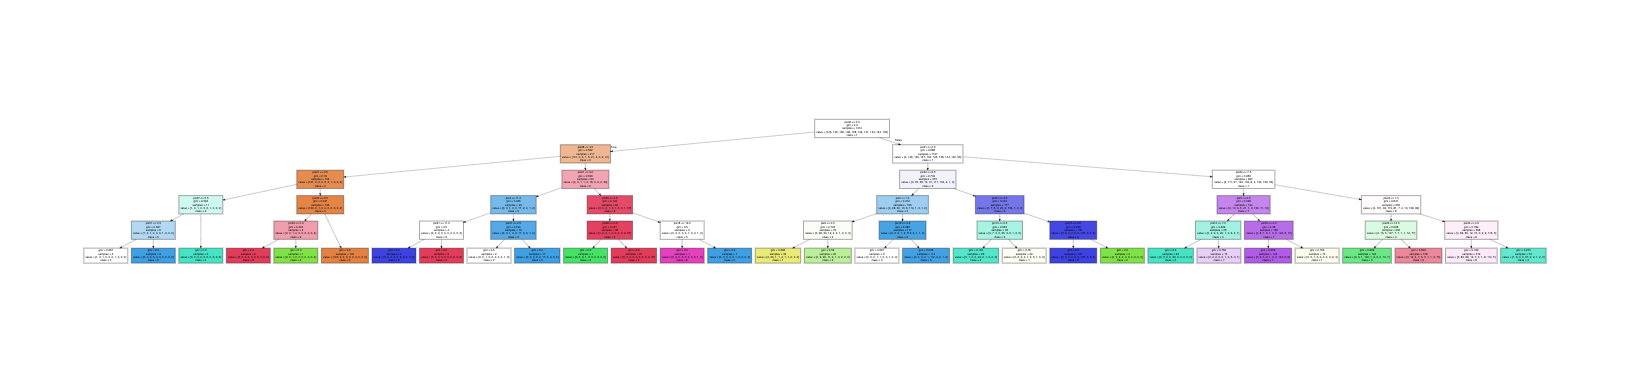

In [76]:
from IPython import display
display.Image("./digits_screenshot2.png")

In [61]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 8. 1. 3. 6. 9. 5. 7. 8. 1. 8. 7. 5. 9. 9. 4. 1. 8. 3. 1. 8. 5. 4.
 8. 2. 7. 1. 0. 5. 8. 9. 9. 3. 4. 7. 0. 8. 8. 6. 4. 8. 1. 3. 8. 9. 9. 3.
 7. 8. 5. 1. 0. 6. 4. 8. 1. 0. 8. 3. 5. 7. 8. 6. 7. 4. 9. 0. 8. 7. 0. 8.
 0. 9. 7. 3. 5. 4. 0. 1. 1. 4. 4. 3. 6. 6. 8. 3. 7. 0. 7. 7. 3. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 7. 0. 5. 0. 1. 2. 4. 7. 3. 6. 8. 8. 7. 4. 2. 6. 3. 8.
 8. 7. 1. 8. 9. 9. 4. 8. 8. 6. 3. 6. 3. 9. 8. 6. 8. 5. 7. 5. 4. 4. 8. 9.
 2. 8. 9. 8. 9. 6. 3. 4. 8. 9. 0. 0. 7. 5. 3. 7. 5. 8. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 8. 8. 6. 8. 7. 8. 4. 2. 8. 5. 8. 8. 9. 5. 8. 5. 4. 4. 3. 1. 0.
 0. 6. 8. 8. 8. 9. 4. 5. 4. 3. 9. 9. 3. 0. 2. 0. 9. 9. 1. 8. 3. 8. 9. 6.
 5. 7. 8. 8. 8. 0. 9. 8. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 8. 4. 4. 6. 0. 9. 1. 1. 6. 8. 7. 3. 9. 8. 9. 7. 9. 0. 8. 9. 3. 8.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 4. 9. 5. 8. 8. 0. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 8. 4. 9. 8. 8. 4. 8. 9. 3. 0. 7. 1. 5. 7. 3. 9. 6. 7. 9. 3. 8. 8. 8. 3.
 3. 8. 1. 9. 5. 4. 2. 3. 9. 5. 8.

245

In [62]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 5


In [63]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
# Features = [1, 2]  # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
# result = predictive_model( Features )
# print(f"I predict {result} from Features {Features}")

In [64]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.01799117 0.         0.         0.10062562
 0.0223101  0.         0.         0.00285048 0.01061056 0.
 0.01412582 0.03378318 0.         0.         0.         0.
 0.0115054  0.02207285 0.         0.12167573 0.         0.
 0.         0.         0.         0.00207307 0.00484082 0.
 0.         0.         0.         0.16540719 0.         0.
 0.11868316 0.         0.         0.         0.         0.00281529
 0.11526478 0.08282336 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01651018
 0.03789607 0.         0.         0.         0.         0.
 0.09613516 0.         0.         0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    1.80% of the decision-making importance.
Feature         pix3 has    0.00% of the decision-making importance.
Feature         pix4 has    0.00% of the decision-making import

In [65]:
##       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [66]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 5. 3. 0. 4. 5. 7. 3. 5. 3. 7. 6. 9. 9. 4. 5. 2. 3. 5. 3. 5. 0.
 2. 2. 7. 0. 6. 5. 8. 7. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 5. 3. 8. 9. 9. 9.
 7. 8. 5. 3. 0. 6. 4. 7. 2. 0. 8. 3. 5. 7. 8. 6. 7. 0. 9. 0. 9. 7. 0. 7.
 0. 9. 7. 0. 5. 4. 0. 4. 3. 0. 0. 3. 6. 6. 2. 3. 7. 0. 7. 7. 3. 4. 3. 7.
 8. 6. 7. 1. 0. 8. 2. 0. 5. 0. 0. 5. 4. 7. 3. 6. 3. 9. 7. 0. 5. 6. 3. 2.
 8. 7. 2. 8. 1. 9. 4. 3. 2. 0. 9. 6. 3. 9. 8. 6. 2. 5. 7. 5. 4. 1. 8. 9.
 6. 3. 9. 8. 9. 6. 3. 4. 0. 1. 0. 0. 2. 5. 3. 7. 5. 0. 8. 0. 0. 6. 6. 7.
 8. 5. 9. 8. 8. 0. 8. 7. 3. 0. 2. 7. 5. 9. 3. 1. 5. 2. 7. 4. 0. 3. 2. 0.
 0. 0. 9. 9. 8. 9. 4. 5. 0. 3. 9. 9. 3. 0. 5. 0. 4. 9. 5. 2. 3. 8. 9. 0.
 6. 7. 3. 2. 9. 0. 9. 8. 3. 5. 0. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 7. 0. 4. 6. 0. 9. 0. 7. 0. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 8.
 6. 4. 3. 0. 4. 8. 6. 9. 0. 6. 1. 5. 8. 8. 6. 6. 0. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 4. 9. 3. 0. 7. 3. 5. 7. 9. 9. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 5. 9. 5. 4. 7. 8. 9. 5. 3.

257

In [67]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=251542147)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix26 <= 5.5\ngini = 0.898\nsamples = 557\nvalue = [68, 67, 85, 81, 52, 72, 62, 68, 78, 74]\nclass = 2", fillcolor="#fefffe"] ;
1 [label="gini = 0.778\nsamples = 193\nvalue = [2, 22, 73, 75, 0, 0, 0, 42, 19, 17]\nclass = 3", fillcolor="#fdfffd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.877\nsamples = 364\nvalue = [66, 45, 12, 6, 52, 72, 62, 26, 59, 57]\nclass = 5", fillcolor="#fcfdff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


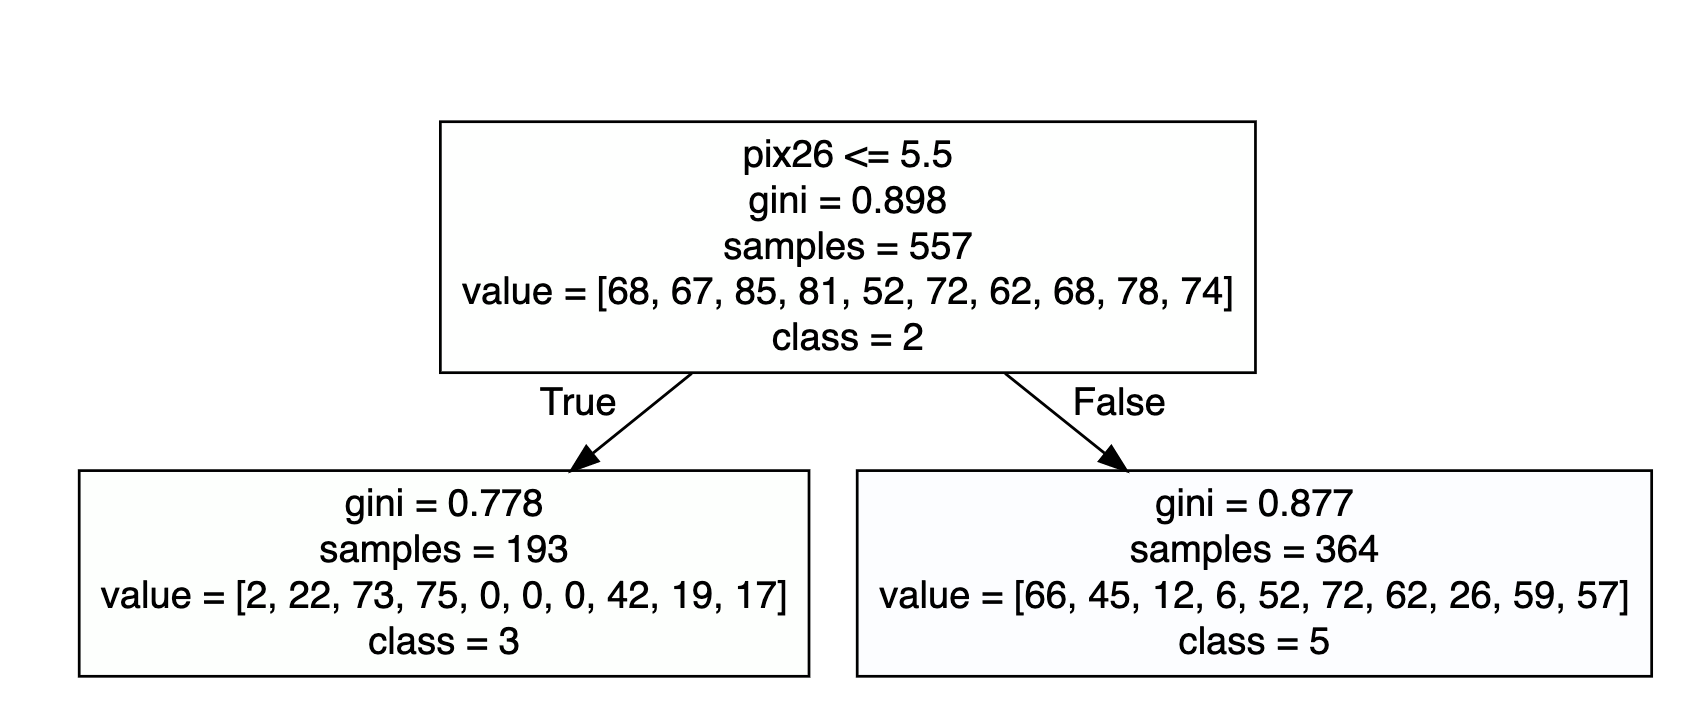

In [78]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./digits_screenshot3.png")  # be sure it's in the right place!

In [69]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#


best_d = d
best_ntrees = 50   # range(50,300,100)
best_score = 0

for d in range(1,6):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.7001
depth:  1 ntrees: 150 cv accuracy:  0.7376
depth:  1 ntrees: 250 cv accuracy:  0.7128
depth:  2 ntrees:  50 cv accuracy:  0.8168
depth:  2 ntrees: 150 cv accuracy:  0.8373
depth:  2 ntrees: 250 cv accuracy:  0.8501
depth:  3 ntrees:  50 cv accuracy:  0.8614
depth:  3 ntrees: 150 cv accuracy:  0.8819
depth:  3 ntrees: 250 cv accuracy:  0.8890
depth:  4 ntrees:  50 cv accuracy:  0.9038
depth:  4 ntrees: 150 cv accuracy:  0.9194
depth:  4 ntrees: 250 cv accuracy:  0.9265
depth:  5 ntrees:  50 cv accuracy:  0.9385
depth:  5 ntrees: 150 cv accuracy:  0.9413
depth:  5 ntrees: 250 cv accuracy:  0.9434

best_depth: 5 and best_num_trees: 50 are our choices.


In [70]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = 5
best_num_trees = 50
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [71]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 1. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 7. 8. 5. 1. 0. 6. 4. 2. 2. 0. 1. 3. 5. 8. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 7. 3. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 1. 7. 2. 1. 1. 9. 4. 8. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 1. 5. 9. 1. 2. 6. 8. 8. 3. 4. 2. 2. 5. 3. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 8. 9. 4. 5. 4. 3. 9. 9. 3. 0. 2. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 7. 2. 2. 9. 0. 9. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 1. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 2. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 9. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 1. 9. 5. 4. 7. 3. 9. 5. 1.

332

In [72]:
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [73]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.00121459 0.02260887 0.00731849 0.00893238 0.0145231
 0.00695892 0.00065657 0.         0.00944368 0.01488163 0.00241616
 0.0137176  0.03233445 0.001866   0.0002206  0.00032403 0.00662929
 0.01417388 0.01795262 0.02677138 0.05650287 0.00888553 0.
 0.         0.01817145 0.0432401  0.01612283 0.03665141 0.01906049
 0.03672352 0.         0.         0.04064897 0.03593408 0.01799971
 0.05817383 0.01807274 0.02264392 0.         0.         0.00756294
 0.04016247 0.03962935 0.02396608 0.01322883 0.02306096 0.
 0.         0.00119495 0.01501156 0.01174206 0.00784472 0.02289866
 0.02755757 0.00088956 0.         0.00028907 0.02184818 0.0085022
 0.05015005 0.0283872  0.02121199 0.00308591]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.12% of the decision-making importance.
Feature         pix2 has    2.26% of the decision-making importance.
Feature         pix3 has    0.73% of the decision-making importance.
Feature         pix4 has 

In [ ]:
# Accuracys
#This week:
#depth:  5  cv accuracy:  0.6726

#Last week:
#k:  1  cv accuracy:  0.9866

In [ ]:
#Importances

